<a href="https://colab.research.google.com/github/alychuk/Deep_Learning_Homework/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

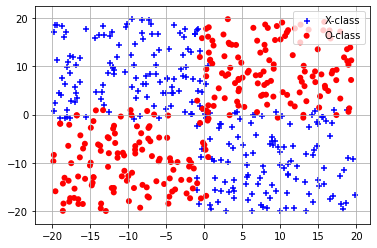

In [ ]:
N = 250 # how many samples

#set up upper and lower bound on your input probabilities
Uh = 20 # upper limit
Ul = -1 # lower limit

o_bound_l = np.array([-Ul, Ul])
o_bound_h = np.array([Uh, -Uh])

# set up the O-class (first and third quadrant)
O1 = np.random.uniform(low=Ul, high=Uh, size=(N,2) )
O2 = np.random.uniform(low=-Uh, high=-Ul, size=(N,2) )
O = np.concatenate((O1,O2))
O = O[np.random.choice(N*2, N, replace=False), :]

X1 = np.random.uniform(low=(Ul,-Uh), high=(Uh,-Ul), size=(N,2) )
X2 = np.random.uniform(low=(-Uh,Ul), high=(-Ul,Uh), size=(N,2) )
X = np.concatenate((X1,X2))
X = X[np.random.choice(N*2, N, replace=False), :]

plt.scatter(X[:,0], X[:,1],marker='+', c='blue', label='X-class')
plt.scatter(O[:,0], O[:,1],marker='o', c='red', edgecolors='none', label='O-class')
plt.legend()
plt.grid(True)

In [ ]:
x_train = np.concatenate((X,O))

y_x= np.full((N,2), (1,0))
y_o= np.full((N,2), (0,1))

y_train = np.concatenate((y_x,y_o))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
print("Input Shape:")
for layer in model.layers:
  print(layer.input_shape)
print("Output Shape:")
for layer in model.layers:
  print(layer.output_shape)
model.summary()
model.get_config()
model.get_weights()

Using TensorFlow backend.





Input Shape:
(None, 2)
(None, 8)
Output Shape:
(None, 8)
(None, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________








[array([[-0.33434317, -0.70160794,  0.37355995,  0.00157696,  0.61413693,
         -0.54506457, -0.43883076,  0.2104702 ],
        [ 0.05672371,  0.36230028, -0.5359776 ,  0.6018052 , -0.28613272,
         -0.30992463,  0.7264143 , -0.11258113]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6669252 , -0.41256455],
        [ 0.01087755,  0.6715231 ],
        [ 0.5926868 , -0.5287314 ],
        [ 0.24798656,  0.35772932],
        [ 0.22592497, -0.6042992 ],
        [-0.50290877, -0.4888627 ],
        [ 0.12157184,  0.3746704 ],
        [ 0.00522512, -0.7235965 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

batch_size=16

model.fit(x_train, y_train, batch_size, 200, 1, shuffle=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
500/500 [==============================] - 0s 390us/step - loss: 2.5898 - acc: 0.4980
Epoch 2/200
500/500 [==============================] - 0s 72us/step - loss: 2.2858 - acc: 0.5000
Epoch 3/200
500/500 [==============================] - 0s 66us/step - loss: 1.9770 - acc: 0.5030
Epoch 4/200
500/500 [==============================] - 0s 70us/step - loss: 1.6925 - acc: 0.5050
Epoch 5/200
500/500 [==============================] - 0s 70us/step - loss: 1.4364 - acc: 0.5110
Epoch 6/200
500/500 [==============================] - 0s 78us/step - loss: 1.2099 - acc: 0.5200
Epoch 7/200
500/500 [==============================] - 0s 76us/step - loss: 1.0191 - acc: 0.5230
Epoch 8/200
500/500 [==============================] - 0s 76us/step - loss: 0.8573 - acc: 0.5340
Epoch 9/200
500/500 [==============================] - 0s 74us/step - loss: 0.7297 - acc: 0.5450
Epoch 10/200
500/500 [======

In [ ]:
x_test = np.concatenate((X[:150,],O[:150,]))

y_x_test= np.full((150,2), (1,0))
y_o_test= np.full((150,2), (0,1))

y_test = np.concatenate((y_x_test,y_o_test))

score= model.evaluate(x_test, y_test, batch_size , 2)
print(score)

[0.14891010125478107, 0.9233333325386047]
